## Project Description:

#### General Instruction
- There will be two sets of datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook using pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook(s) or the .py file(s) of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data preparation

In [288]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sb
pd.set_option("display.max_row",1000)

In [289]:
# read the given regression train csv file using Pandas
reg_df = pd.read_csv('regression_train.csv')
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        898 non-null    object 
 1   Num of Doctors       903 non-null    float64
 2   Num of Staff         907 non-null    float64
 3   Num of Departments   905 non-null    float64
 4   Surgical Facilities  903 non-null    object 
 5   Working Hours        892 non-null    object 
 6   Inpatient Facility   907 non-null    object 
 7   Outpatient Facility  901 non-null    object 
 8   Serving Population   879 non-null    object 
 9   Serving area         903 non-null    object 
 10  Hospital Revenue     1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


#### Data Exploration for numerical Features in the regression dataset 

Hospital Type       Children's hospital  Community hospital  General hospital  \
Serving Population                                                              
100,000 - 150,000                    45                  42                47   
150,000-200,000                      40                  40                39   
200,000+                             40                  41                36   
50,000 - 100,000                     43                  45                30   

Hospital Type       Research hospital  Teaching hospital  
Serving Population                                        
100,000 - 150,000                  39                 44  
150,000-200,000                    34                 33  
200,000+                           25                 36  
50,000 - 100,000                   38                 51  


<Axes: xlabel='Serving Population'>

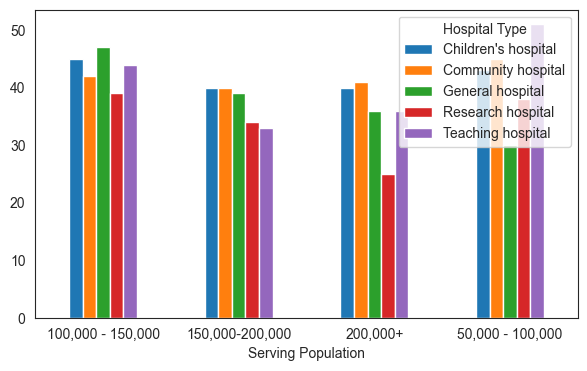

In [290]:
CrosstabResult=pd.crosstab(index=reg_df['Serving Population'],columns=reg_df['Hospital Type'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

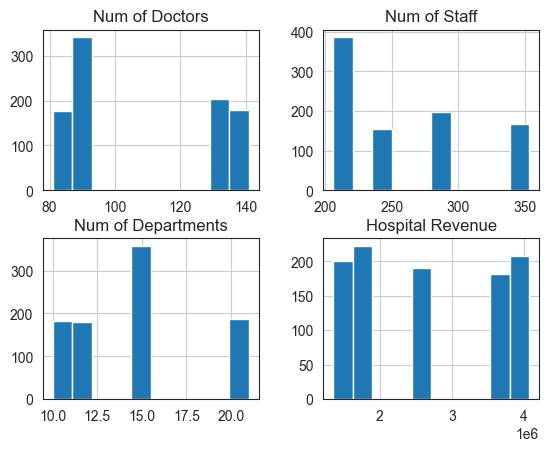

In [77]:
# histogram plot of numerical data in given dataset using pd.hist() function 
reg_df.hist()
plt.show()

In [78]:
reg_df.describe()

,Num of Doctors,Num of Staff,Num of Departments,Hospital Revenue
count,903.000000,907.000000,905.000000,1.000000e+03
mean,107.880399,260.184123,14.630939,2.651581e+06
std,25.125165,54.164620,3.754457,1.041047e+06
min,81.000000,206.000000,10.000000,1.356885e+06
25%,89.000000,212.000000,12.000000,1.781324e+06
50%,90.000000,249.000000,15.000000,2.584425e+06
75%,133.000000,290.000000,15.000000,3.598448e+06
max,141.000000,353.000000,21.000000,4.069519e+06


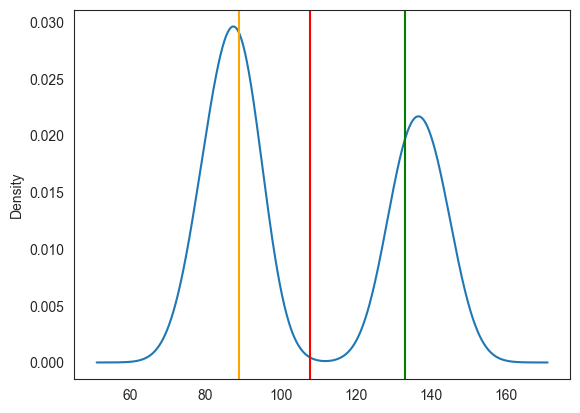

In [79]:

reg_df['Num of Doctors'].plot(kind='kde',label='Num of Doctors')
plt.axvline(x=reg_df['Num of Doctors'].describe().to_dict()['25%'] , color = 'orange')
plt.axvline(x=reg_df['Num of Doctors'].describe().to_dict()['75%'] , color = 'green')
plt.axvline(x=reg_df['Num of Doctors'].mean() , color = 'red')
plt.show()

<Axes: ylabel='Density'>

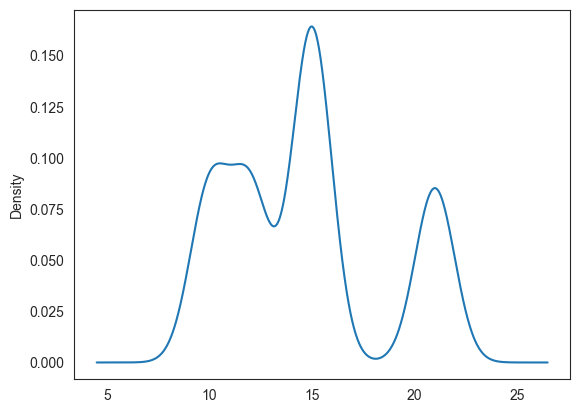

In [80]:
reg_df['Num of Departments'].plot(kind='kde')

<Axes: ylabel='Density'>

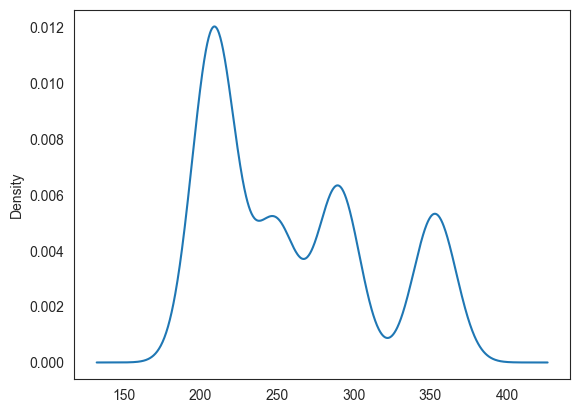

In [81]:
reg_df['Num of Staff'].plot(kind='kde')


#### Data exploration of Categorical Variable 

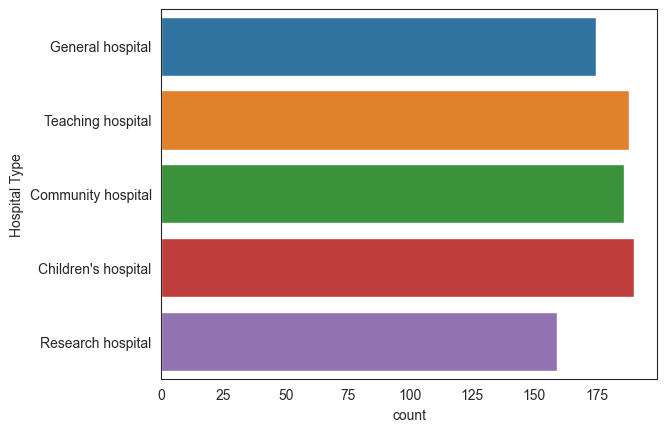

In [82]:
sb.countplot(y='Hospital Type',data=reg_df)
plt.show()

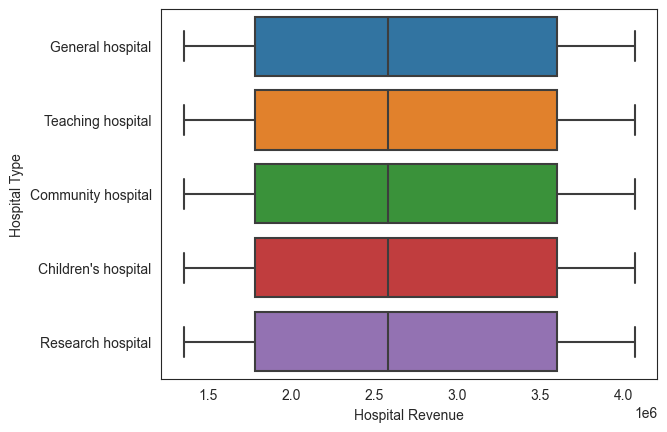

/var/folders/p2/0dct3c2n3031b7sgthqw_np00000gn/T/ipykernel_23938/3953077614.py:4: FutureWarning: ['Surgical Facilities', 'Working Hours', 'Inpatient Facility', 'Outpatient Facility', 'Serving Population', 'Serving area'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  reg_df.groupby('Hospital Type').agg(['mean','median'])


Num of Doctors        Num of Staff         \
                              mean median         mean median   
Hospital Type                                                   
Children's hospital     109.396450   90.0   265.068182  249.0   
Community hospital      109.846626   90.0   257.574713  249.0   
General hospital        107.478261   90.0   262.600000  249.0   
Research hospital       105.442177   90.0   268.888112  249.0   
Teaching hospital       108.629412   90.0   252.852941  212.0   

                    Num of Departments        Hospital Revenue             
                                  mean median             mean     median  
Hospital Type                                                              
Children's hospital          14.597701   15.0     2.696505e+06  2584425.0  
Community hospital           14.927711   15.0     2.653654e+06  2584425.0  
General hospital             14.638158   15.0     2.614870e+06  2584425.0  
Research hospital            13.979310   15.0     2.704184e+06  2584425.0  
Teaching hospital            14.965714   15.0     2.508198e+06  2584425.0

In [83]:
sb.boxplot(y='Hospital Type',x='Hospital Revenue',data=reg_df)
plt.show()

reg_df.groupby('Hospital Type').agg(['mean','median'])

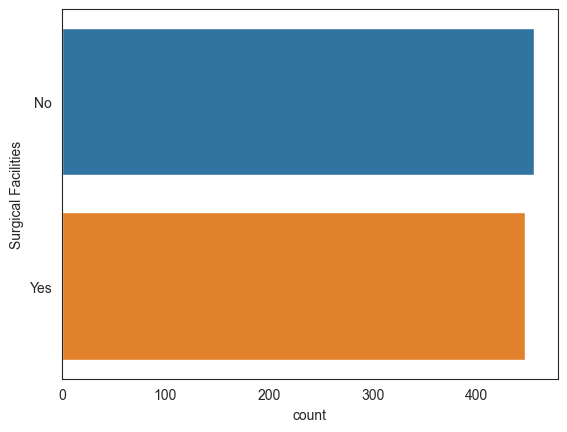

<Axes: xlabel='Hospital Revenue', ylabel='Surgical Facilities'>

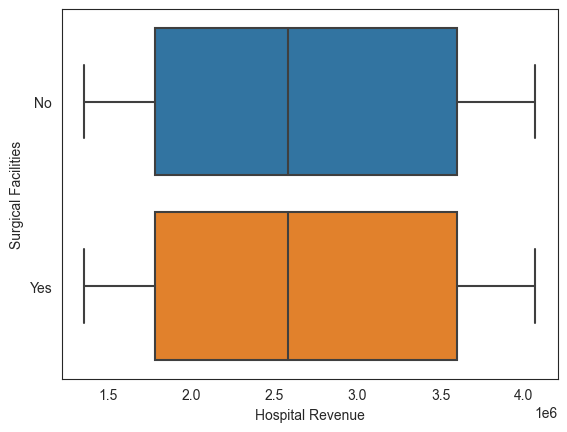

In [84]:
sb.countplot(y=reg_df['Surgical Facilities'])
plt.show()
sb.boxplot(x='Hospital Revenue',y='Surgical Facilities',data=reg_df)

In [85]:
reg_df['Surgical Facilities'].value_counts()

No     456
Yes    447
Name: Surgical Facilities, dtype: int64

In [86]:
reg_df['Working Hours'].value_counts()

8-5     241
24/7    227
9-6     216
10-7    208
Name: Working Hours, dtype: int64

In [87]:
reg_df['Serving Population'].value_counts()

100,000 - 150,000    243
50,000 - 100,000     229
150,000-200,000      213
200,000+             194
Name: Serving Population, dtype: int64

/var/folders/p2/0dct3c2n3031b7sgthqw_np00000gn/T/ipykernel_23938/2818425414.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = reg_df.corr()


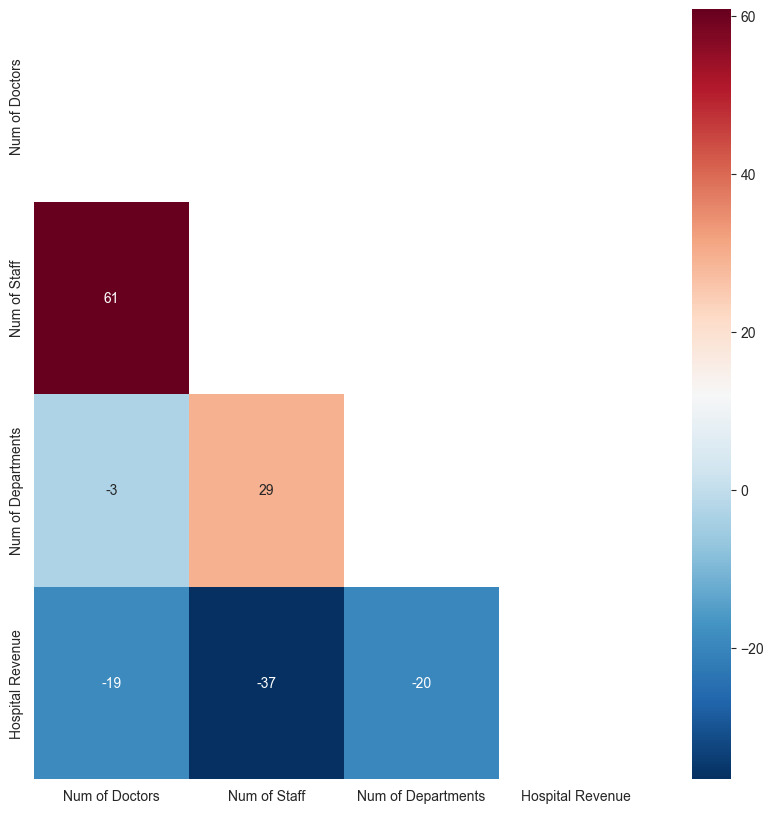

In [88]:
correlation = reg_df.corr()
sb.set_style('white')

plt.figure(figsize=(10,10))

mask =np.zeros_like(correlation)

mask[np.triu_indices_from(mask)] = 1

sb.heatmap(correlation*1000,cmap='RdBu_r',annot=True,fmt='0.0f' , mask=mask ,cbar = True)
plt.show()

#### Handling Missing value of Numerical Features

In [89]:
# missing value for Num of Doctors uses Q1 since from the above Kde plot we can tell it has Bimodel Distribution 
reg_df['Num of Doctors'].fillna(reg_df['Num of Doctors'].describe().to_dict()['25%'],inplace=True)

reg_df['Num of Departments'].fillna(reg_df['Num of Departments'].mode(),inplace=True)

In [90]:
# Missing value imputation of Num of Staff and Num of Dept we use most frequent values for the missing value since Kde
# plot of both features is multi-modal distribution.
median_staff = reg_df['Num of Staff'].median()
reg_df['Num of Staff'].fillna(median_staff,inplace=True)

In [91]:
median_Dept = reg_df['Num of Departments'].median()
reg_df['Num of Departments'].fillna(median_Dept,inplace=True)

In [92]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        898 non-null    object 
 1   Num of Doctors       1000 non-null   float64
 2   Num of Staff         1000 non-null   float64
 3   Num of Departments   1000 non-null   float64
 4   Surgical Facilities  903 non-null    object 
 5   Working Hours        892 non-null    object 
 6   Inpatient Facility   907 non-null    object 
 7   Outpatient Facility  901 non-null    object 
 8   Serving Population   879 non-null    object 
 9   Serving area         903 non-null    object 
 10  Hospital Revenue     1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


#### Handling of Missing values for Categorical variables

In [93]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        898 non-null    object 
 1   Num of Doctors       1000 non-null   float64
 2   Num of Staff         1000 non-null   float64
 3   Num of Departments   1000 non-null   float64
 4   Surgical Facilities  903 non-null    object 
 5   Working Hours        892 non-null    object 
 6   Inpatient Facility   907 non-null    object 
 7   Outpatient Facility  901 non-null    object 
 8   Serving Population   879 non-null    object 
 9   Serving area         903 non-null    object 
 10  Hospital Revenue     1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [98]:
reg_df['Hospital Type'].fillna('Missing',inplace=True)

In [99]:
# Surgical Facilties we would use this most frequent value in each Hospital Type 
cat_features=[]
for col, val in reg_df.select_dtypes(include="object").isnull().sum().to_dict().items() :
    if val > 0  and col != 'Hospital Type':
        cat_features.append(col)
for Hos_Type in reg_df['Hospital Type'].unique().tolist():
    print(Hos_Type)
    sliced_df=reg_df[reg_df['Hospital Type']==Hos_Type]
    for col in cat_features:
        df= sliced_df[sliced_df[col].isnull()]
        index=df.index.tolist()
        reg_df.loc[index,col]=sliced_df[col].value_counts().index.to_list()[0]
    

General hospital
Missing
Teaching hospital
Community hospital
Children's hospital
Research hospital


In [101]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        1000 non-null   object 
 1   Num of Doctors       1000 non-null   float64
 2   Num of Staff         1000 non-null   float64
 3   Num of Departments   1000 non-null   float64
 4   Surgical Facilities  1000 non-null   object 
 5   Working Hours        1000 non-null   object 
 6   Inpatient Facility   1000 non-null   object 
 7   Outpatient Facility  1000 non-null   object 
 8   Serving Population   1000 non-null   object 
 9   Serving area         1000 non-null   object 
 10  Hospital Revenue     1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


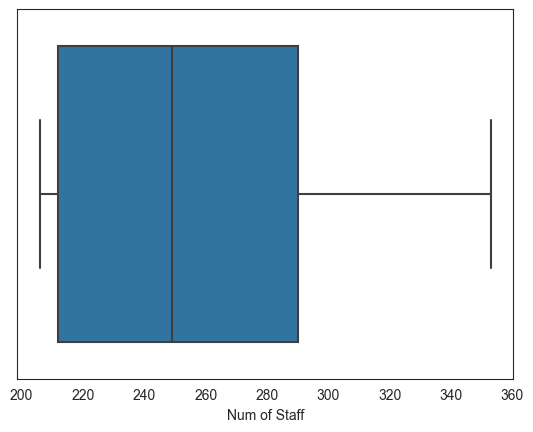

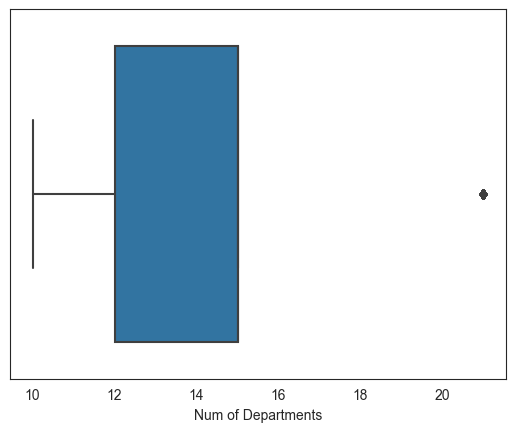

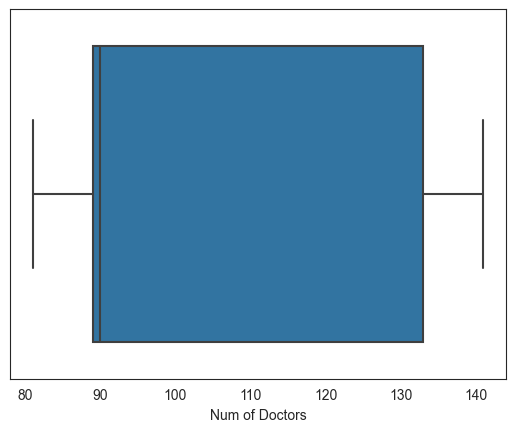

In [102]:
# Identify Potential outliers in the dataset
# creating the box plot for numerical values:
sb.boxplot(x='Num of Staff',data=reg_df)
plt.show()
sb.boxplot(x='Num of Departments',data=reg_df)
plt.show()
sb.boxplot(x='Num of Doctors',data=reg_df)
plt.show()

In [103]:
reg_df.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue
0,General hospital,133.0,290.0,10.0,No,10-7,No,No,"100,000 - 150,000",Rural,1356885
1,General hospital,141.0,290.0,15.0,No,24/7,Yes,Yes,"200,000+",Urban,2584425
2,Missing,89.0,212.0,15.0,Yes,8-5,Yes,No,"100,000 - 150,000",Rural,4069519
3,Teaching hospital,81.0,249.0,15.0,No,9-6,Yes,No,"50,000 - 100,000",Rural,2584425
4,Community hospital,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",Rural,1781324


In [104]:
reg_df['Surgical Facilities'].value_counts()

No     506
Yes    494
Name: Surgical Facilities, dtype: int64

In [105]:
reg_df['Surgical Facilities'].replace({'No':1,'Yes':0},inplace=True)

In [106]:
reg_df['Inpatient Facility'].value_counts()

Yes    531
No     469
Name: Inpatient Facility, dtype: int64

In [107]:
reg_df['Inpatient Facility'].replace({'No':0,'Yes':1},inplace=True)

In [108]:
reg_df['Outpatient Facility'].value_counts()

Yes    531
No     469
Name: Outpatient Facility, dtype: int64

In [109]:
reg_df['Outpatient Facility'].replace({'No':0,'Yes':1},inplace=True)

In [110]:
reg_df['Serving Population'].value_counts()

100,000 - 150,000    311
50,000 - 100,000     271
150,000-200,000      224
200,000+             194
Name: Serving Population, dtype: int64

In [111]:
reg_df['Serving Population'].replace({'200,000+':3,'150,000-200,000':2,'50,000 - 100,000':0,'100,000 - 150,000':1},inplace=True)

In [112]:
reg_df_hospitalType = pd.get_dummies(reg_df['Hospital Type'],prefix='Hospital_Type')
reg_df[reg_df_hospitalType.columns]=reg_df_hospitalType

In [113]:
reg_df_Work = pd.get_dummies(reg_df['Working Hours'],prefix='Working_Hours')
reg_df[reg_df_Work.columns]=reg_df_Work

In [114]:
reg_df.drop(['Hospital Type','Working Hours'],axis=1,inplace=True)

In [115]:
reg_df['Serving area'].value_counts()

Rural    550
Urban    450
Name: Serving area, dtype: int64

In [116]:
reg_df['Serving area'].replace({'Rural':1,'Urban':0},inplace=True)

In [117]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Num of Doctors                     1000 non-null   float64
 1   Num of Staff                       1000 non-null   float64
 2   Num of Departments                 1000 non-null   float64
 3   Surgical Facilities                1000 non-null   int64  
 4   Inpatient Facility                 1000 non-null   int64  
 5   Outpatient Facility                1000 non-null   int64  
 6   Serving Population                 1000 non-null   int64  
 7   Serving area                       1000 non-null   int64  
 8   Hospital Revenue                   1000 non-null   int64  
 9   Hospital_Type_Children's hospital  1000 non-null   uint8  
 10  Hospital_Type_Community hospital   1000 non-null   uint8  
 11  Hospital_Type_General hospital     1000 non-null   uint8 

In [118]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
Y = reg_df['Hospital Revenue']
X = reg_df.drop('Hospital Revenue',axis = 1)
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


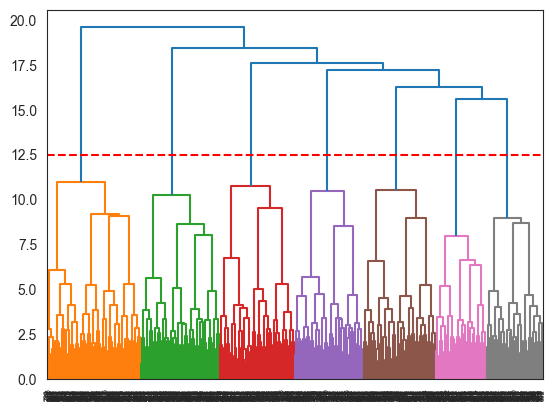

In [917]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X_scaled, method = 'ward'))
plt.axhline(y=12.5, color='r', linestyle='--')
plt.show()

### From the above Dendogram we can see that the dataset can be split into 6 cluster with 12.5 threshold

In [905]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster_reg= AgglomerativeClustering(distance_threshold=12.5,n_clusters=None)
agg_cluster_reg.fit(X_scaled)

AgglomerativeClustering(distance_threshold=12.5, n_clusters=None)

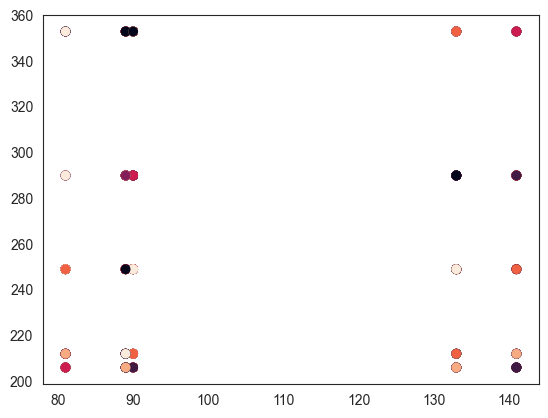

In [908]:
plt.scatter(x ='Num of Doctors',y='Num of Staff',data=X ,c=agg_cluster_reg.labels_)
plt.show()

In [919]:

Agg_cluster_df = pd.read_csv('regression_train.csv')

In [920]:
Agg_cluster_df['Label']=agg_cluster_reg.labels_
Agg_cluster_df.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital Revenue,Label
0,General hospital,133.0,290.0,10.0,No,10-7,No,No,NaN,Rural,1356885,3
1,General hospital,141.0,290.0,NaN,No,24/7,Yes,Yes,"200,000+",Urban,2584425,4
2,NaN,89.0,212.0,15.0,Yes,8-5,Yes,NaN,"100,000 - 150,000",Rural,4069519,6
3,Teaching hospital,81.0,249.0,15.0,No,9-6,Yes,No,NaN,Rural,2584425,1
4,Community hospital,141.0,353.0,21.0,Yes,9-6,Yes,Yes,"50,000 - 100,000",Rural,1781324,2


In [921]:
Agg_cluster_df['Label'].value_counts()

0    190
5    159
1    151
2    147
4    138
3    114
6    101
Name: Label, dtype: int64

In [926]:
Agg_cluster_df[Agg_cluster_df['Label']==0]['Hospital Type'].value_counts()

Children's hospital    190
Name: Hospital Type, dtype: int64

In [928]:
Agg_cluster_df[Agg_cluster_df['Label']==0].groupby('Hospital Type').agg(['mean','median'])['Hospital Revenue']

/var/folders/p2/0dct3c2n3031b7sgthqw_np00000gn/T/ipykernel_23938/1066933100.py:1: FutureWarning: ['Surgical Facilities', 'Working Hours', 'Inpatient Facility', 'Outpatient Facility', 'Serving Population', 'Serving area'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Agg_cluster_df[Agg_cluster_df['Label']==0].groupby('Hospital Type').agg(['mean','median'])['Hospital Revenue']


,mean,median
Hospital Type,,
Children's hospital,2.696505e+06,2584425.0


### from the AgglomerativeClustering with 6 cluster  the largest cluster  has only Children's Hospital as Hosiptal Type

In [931]:
Agg_cluster_df[Agg_cluster_df['Label']==3]['Hospital Type'].value_counts()

Community hospital    39
General hospital      37
Teaching hospital     37
Name: Hospital Type, dtype: int64

In [119]:
Kmeans_X_df = pd.DataFrame(X_scaled,columns=X.columns)


In [120]:
Kmeans_X_df.head()

,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital_Type_Children's hospital,Hospital_Type_Community hospital,Hospital_Type_General hospital,Hospital_Type_Missing,Hospital_Type_Research hospital,Hospital_Type_Teaching hospital,Working_Hours_10-7,Working_Hours_24/7,Working_Hours_8-5,Working_Hours_9-6
0,0.866667,0.571429,0.000000,1.0,0.0,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.000000,0.571429,0.454545,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.133333,0.040816,0.454545,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.292517,0.454545,1.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
X.shape

(1000, 18)

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


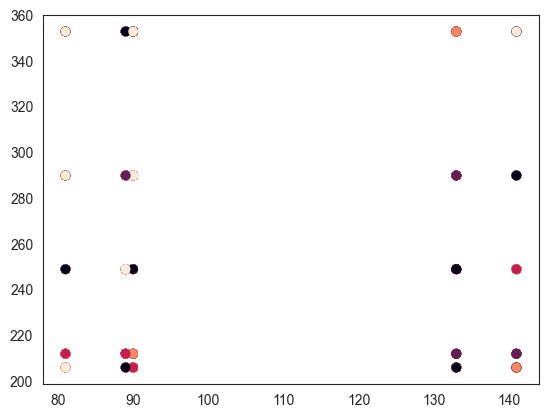

In [122]:
# we are creating the 5 clustering model since we have the 5 different type of hospital in our dataset:
km  = KMeans(n_clusters=5)
Kmeans = km.fit(Kmeans_X_df)

plt.scatter(x ='Num of Doctors',y='Num of Staff',data=X ,c=Kmeans.labels_)
plt.show()




### Regression model training

In [692]:
# Method used for scaling is MinMaxScaler() for this datatset 
reg_score = {}
X_train = X
Y_train = Y

In [916]:
X_train.head()

,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Hospital_Type_Children's hospital,Hospital_Type_Community hospital,Hospital_Type_General hospital,Hospital_Type_Missing,Hospital_Type_Research hospital,Hospital_Type_Teaching hospital,Working_Hours_10-7,Working_Hours_24/7,Working_Hours_8-5,Working_Hours_9-6
0,133.0,290.0,10.0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0
1,141.0,290.0,15.0,1,1,1,3,0,0,0,1,0,0,0,0,1,0,0
2,89.0,212.0,15.0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0
3,81.0,249.0,15.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1
4,141.0,353.0,21.0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1


In [693]:
X_train.shape

(1000, 18)

In [764]:
scaler_reg = MinMaxScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)


In [765]:
from sklearn.linear_model import LinearRegression , SGDRegressor
lm = LinearRegression()
lm.fit(X_train_scaled,Y_train)
print("R2-score :" ,lm.score(X_train_scaled,Y_train))
reg_score['Simple Linear Regression'] = lm.score(X_train_scaled,Y_train)

R2-score : 0.01193391821341816


### r2 -score suggests that this is an good metric for this model determination so we will be using Mean Absolute error

In [697]:
from sklearn.metrics import mean_absolute_error 
y_lmpred = lm.predict(X_train_scaled)
y_testlmpred = lm.predict(X_valid_scaled)

print("Train MAE:",mean_absolute_error(Y_train,y_lmpred))

Train MAE: 923528.677


In [698]:
X_train_MLR = pd.DataFrame(X_train_scaled , columns=X.columns.to_list())

In [699]:
import statsmodels.api as sm
X_train_MLR = pd.DataFrame(X_train_scaled , columns=X.columns.to_list())
X_train_MLR = sm.add_constant(X_train_MLR)
model = sm.OLS(Y_train.values.reshape(-1,1),X_train_MLR).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8379
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.643
Time:                        20:04:16   Log-Likelihood:                -15267.
No. Observations:                1000   AIC:                         3.057e+04
Df Residuals:                     983   BIC:                         3.065e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2.011e+06    9.9e+04     20.316      0.000    1.82e+06    2.21e+06
Num of Doctors                    -2.397e+04   8.13e+04     -0.295      0.768   -1.83e+05    1.36e+05
Num of Staff                      -1.157e+05    9.5e+04     -1.218      0.223   -3.02e+05    7.07e+04
Num of Departments                 -5.02e+04   1.03e+05     -0.489      0.625   -2.52e+05    1.51e+05
Surgical Facilities               -4.168e+04   6.74e+04     -0.618      0.536   -1.74e+05    9.06e+04
Inpatient Facility                 5.686e+04   6.68e+04      0.851      0.395   -7.43e+04    1.88e+05
Outpatient Facility               -1.369e+04   6.76e+04     -0.202      0.840   -1.46e+05    1.19e+05
Serving Population                 -6.49e+04   1.34e+05     -0.485      0.628   -3.27e+05    1.97e+05
Serving area                      -1.545e+05   9.69e+04     -1.595      0.111   -3.45e+05    3.56e+04
Hospital_Type_Children's hospital  3.809e+05   7.53e+04      5.059      0.000    2.33e+05    5.29e+05
Hospital_Type_Community hospital   3.218e+05   7.35e+04      4.379      0.000    1.78e+05    4.66e+05
Hospital_Type_General hospital     2.803e+05   7.65e+04      3.665      0.000     1.3e+05     4.3e+05
Hospital_Type_Missing              4.483e+05   9.34e+04      4.802      0.000    2.65e+05    6.32e+05
Hospital_Type_Research hospital    3.877e+05   7.83e+04      4.953      0.000    2.34e+05    5.41e+05
Hospital_Type_Teaching hospital    1.921e+05   7.36e+04      2.611      0.009    4.77e+04    3.36e+05
Working_Hours_10-7                 5.405e+05   6.63e+04      8.146      0.000     4.1e+05    6.71e+05
Working_Hours_24/7                 4.838e+05   6.06e+04      7.988      0.000    3.65e+05    6.03e+05
Working_Hours_8-5                  4.999e+05   6.06e+04      8.251      0.000    3.81e+05    6.19e+05
Working_Hours_9-6                  4.871e+05   6.58e+04      7.404      0.000    3.58e+05    6.16e+05
==============================================================================
Omnibus:                     6544.525   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.552
Skew:                           0.131   Prob(JB):                     1.46e-22
Kurtosis:                       1.469   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [700]:
ColList = []
for col , val in model.pvalues.to_dict().items():
    if val > 0.05:
        ColList.append(col)


In [701]:
print(ColList)

['Num of Doctors', 'Num of Staff', 'Num of Departments', 'Surgical Facilities', 'Inpatient Facility', 'Outpatient Facility', 'Serving Population', 'Serving area']


In [702]:
X_train_MLR.drop(ColList,axis=1,inplace=True)

In [703]:
lr = LinearRegression()
lr.fit(X_train_MLR,Y_train)
print("Train MAE:",mean_absolute_error(Y_train,lr.predict(X_train_MLR)))
print("Train r2 score:",lr.score(X_train_MLR,Y_train))
reg_score["OLS"] = lr.score(X_train_MLR,Y_train)

Train MAE: 928281.981
Train r2 score: 0.004057244511522451


In [709]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, criterion= 'squared_error',max_depth =1)

dt_reg.fit(X_train_scaled,Y_train)

print(dt_reg.score(X_train_scaled,Y_train))

reg_score['DecisionTree Regressor'] = dt_reg.score(X_train_scaled,Y_train)


0.0043963302392893144


In [721]:
# Hypertuning Decision Tree Regressor for the regression dataset 

max_depth1 = [1,2,3,4,5,6,7,8,10,12,13,14]
max_features1 = [0.01,0.1,0.2,0.5]
train_score_dt_hyp = []

index_reg_dt = []

for d in  max_depth1 :
    for f in max_features1:
        for s  in [2,5,10]:
            for l in [1,2,4]:
                model = DecisionTreeRegressor(random_state=0 , max_depth=d, max_features= f,min_samples_leaf=l,min_samples_split=s,criterion='squared_error')
                model.fit(X_train_scaled,Y_train)
                train_score_dt_hyp.append(model.score(X_train_scaled,Y_train))
                index_reg_dt.append((d,f,s,l))    
        

In [722]:
scores_regdt = pd.DataFrame({'trainscore':train_score_dt_hyp},index=index_reg_dt)
scores_regdt.sort_values(by='trainscore',ascending=False)

,trainscore
"(14, 0.5, 2, 1)",0.916683
"(13, 0.5, 2, 1)",0.890127
"(14, 0.01, 2, 1)",0.888287
"(14, 0.1, 2, 1)",0.888287
"(13, 0.1, 2, 1)",0.871652
"(13, 0.01, 2, 1)",0.871652
"(14, 0.2, 2, 1)",0.866042
"(13, 0.2, 2, 1)",0.768426
"(12, 0.5, 2, 1)",0.762350
"(12, 0.01, 2, 1)",0.707850


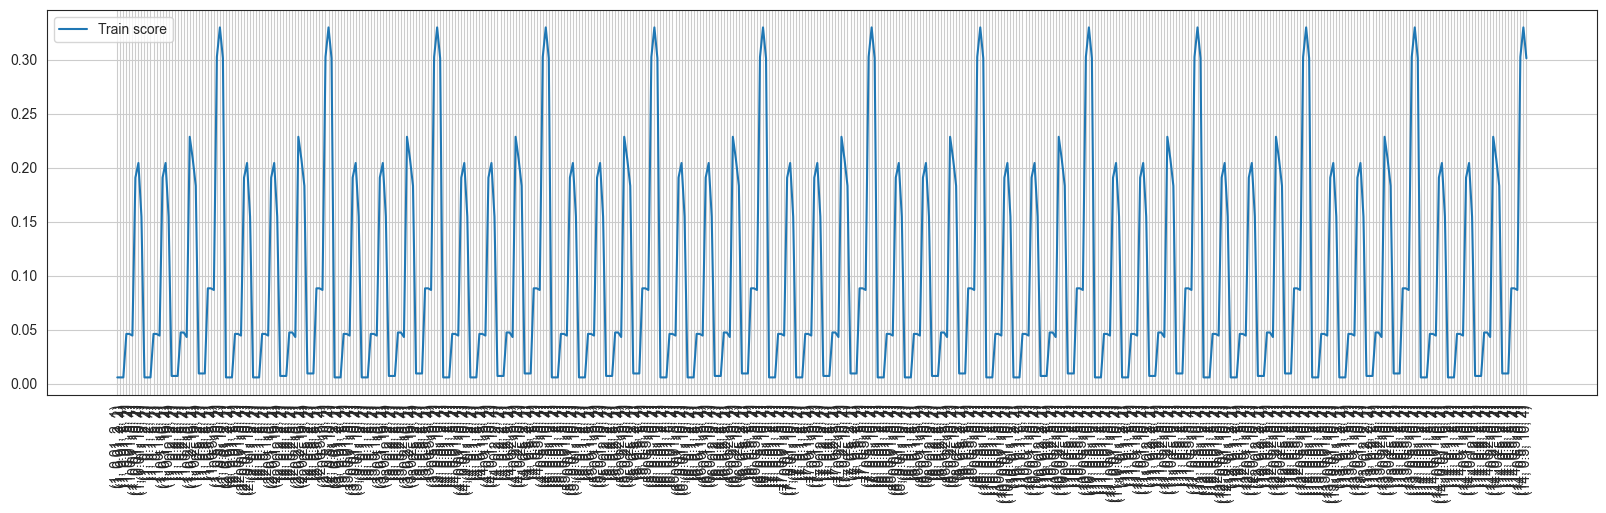

In [713]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_reg_dt)), train_score_dt_hyp, label = 'Train score')
plt.xticks(range(len(index_reg_dt)), index_reg_dt, rotation = 90)
plt.legend()
plt.grid()

In [728]:
## best model for the decision tree with hyperparmeter tunning (max_dept=2,max_features= 0.5, 
#.           min_sample_split= 10,min_sample_leaf=2

best_dt_reg = DecisionTreeRegressor( random_state=0,max_depth=14,max_features= 0.5, 
                             min_samples_split= 2,min_samples_leaf=1)

best_dt_reg.fit(X_train_scaled,Y_train)
best_dt_reg_score = best_dt_reg.score(X_train_scaled,Y_train)
print(best_dt_reg.score(X_train_scaled,Y_train))

reg_score['DecisionTree Regressor with Hyperparameter '] = best_dt_reg_score

0.9166829559822453


In [726]:
from sklearn.ensemble import BaggingRegressor

train_score_bg = []
index_bg = []
for n_estimators in [50,100, 500]:
    for max_samples in [0.1, 0.2, 0.5, 1]:
        for max_features in [0.1, 0.5, 1.0]:
            for max_depth in [1,2,5,10,20,50]:
                base_estimator = DecisionTreeRegressor(max_depth=max_depth , random_state= 0)
                bagging_clf = BaggingRegressor(base_estimator= base_estimator,
                            n_estimators= n_estimators,
                                max_samples= max_samples,
                                max_features= max_features,
                                random_state= 0)

                bagging_clf.fit(X_train_scaled, Y_train)
                train_score_bg.append(bagging_clf.score(X_train_scaled, Y_train))
                index_bg.append((n_estimators,
                              max_samples, max_features,max_depth))

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

In [737]:
scores_bg_hyp_reg = pd.DataFrame({'train_score_bg':train_score_bg},index=index_bg)
scores_bg_hyp_reg.sort_values(by='train_score_bg',ascending=False)

,train_score_bg
"(500, 0.5, 1.0, 50)",0.610321
"(500, 0.5, 1.0, 20)",0.610321
"(100, 0.5, 1.0, 50)",0.604051
"(100, 0.5, 1.0, 20)",0.604051
"(50, 0.5, 1.0, 50)",0.593128
"(50, 0.5, 1.0, 20)",0.593128
"(500, 0.5, 1.0, 10)",0.528251
"(100, 0.5, 1.0, 10)",0.523384
"(50, 0.5, 1.0, 10)",0.513353
"(50, 0.5, 0.5, 50)",0.444210


In [738]:
dt_model_best = DecisionTreeRegressor(max_depth= 50,random_state = 0)
bag_dt_model = BaggingRegressor(dt_model_best, 
                                max_samples=0.5,
                                max_features=1.0, 
                                n_estimators=500, 
                                bootstrap=True, 
                                random_state=0)
bag_dt_model.fit(X_train_scaled, Y_train)
bagg_reg_score = bag_dt_model.score(X_train_scaled, Y_train)
reg_score['Bagging with Decision Tree']= bagg_reg_score
print('Train score: ', bagg_reg_score)

Train score:  0.6103208876580113


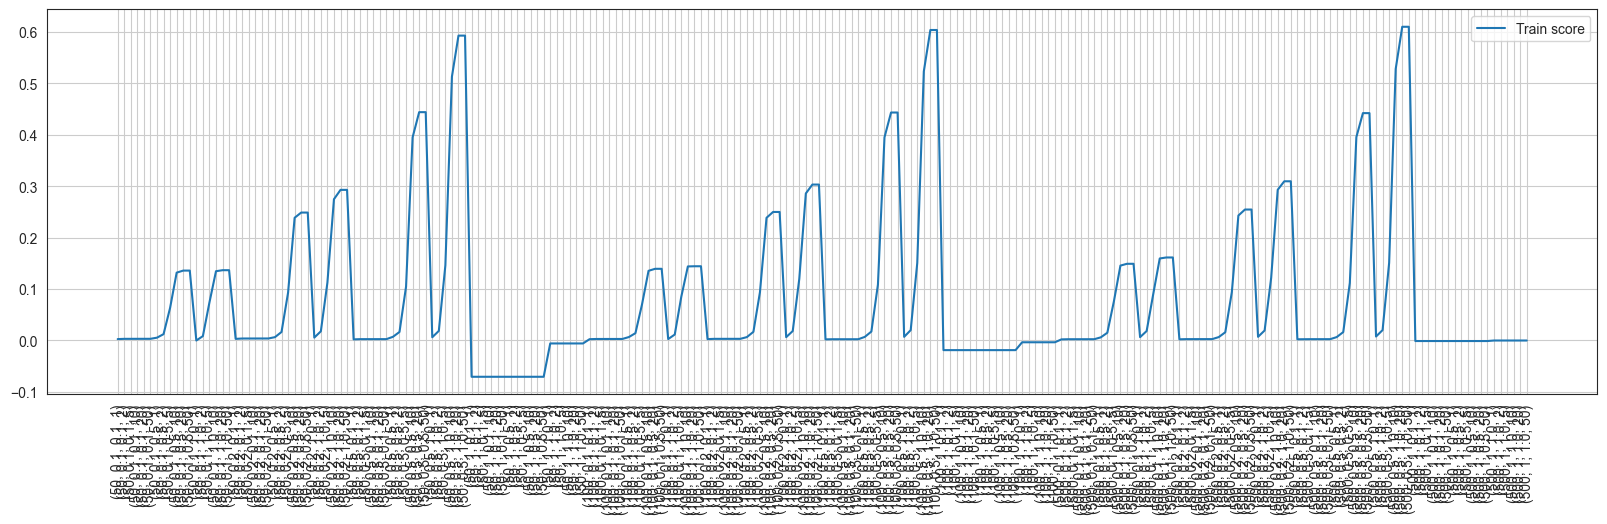

In [739]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_bg)), train_score_bg, label = 'Train score')
plt.xticks(range(len(index_bg)), index_bg, rotation = 90)
plt.legend()
plt.grid()

In [740]:
from sklearn.linear_model import SGDRegressor

train_score_sgd = []
index_sgd = []

for max_iter in [200,300,400,500]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001, 0.00001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_scaled, Y_train)
        train_score_sgd.append(sgd.score(X_train_scaled,Y_train))
        index_sgd.append((max_iter, eta0))

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number

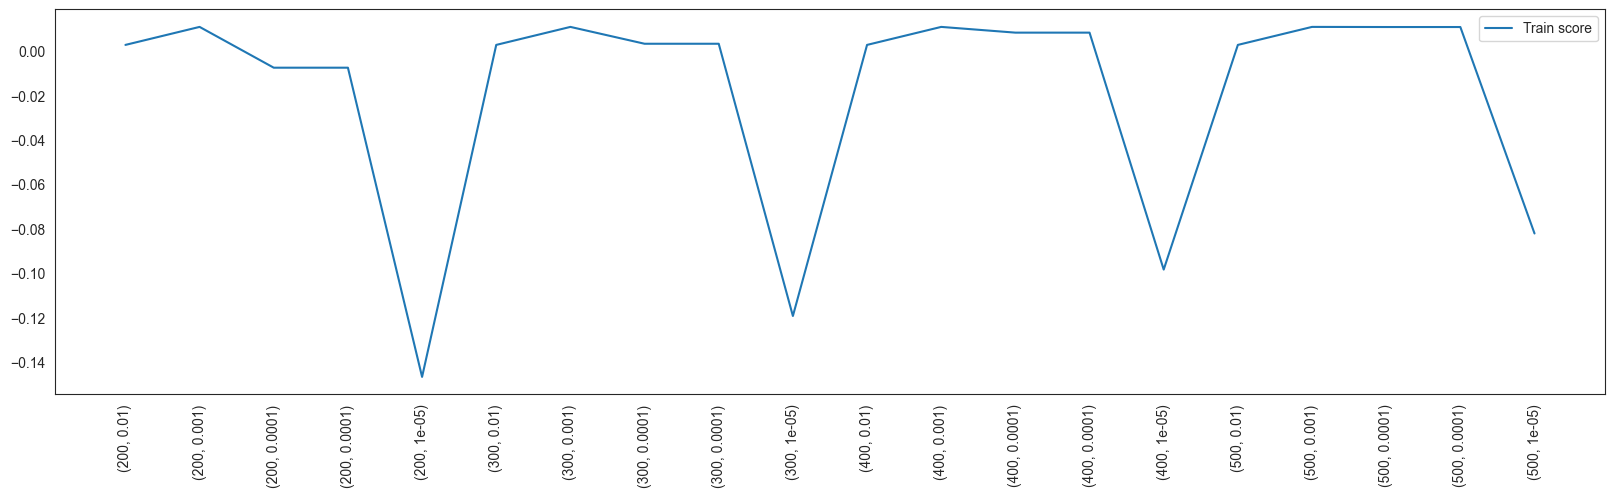

In [741]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_sgd)),  train_score_sgd, label = 'Train score')
plt.xticks(range(len(index_sgd)), index_sgd, rotation = 90)
plt.legend()
plt.show()

In [745]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train_scaled,Y_train)
print(regr.score(X_train_scaled,Y_train))
reg_score['Simple RandomForest Regressor']= regr.score(X_train_scaled,Y_train)

0.1627663649606118


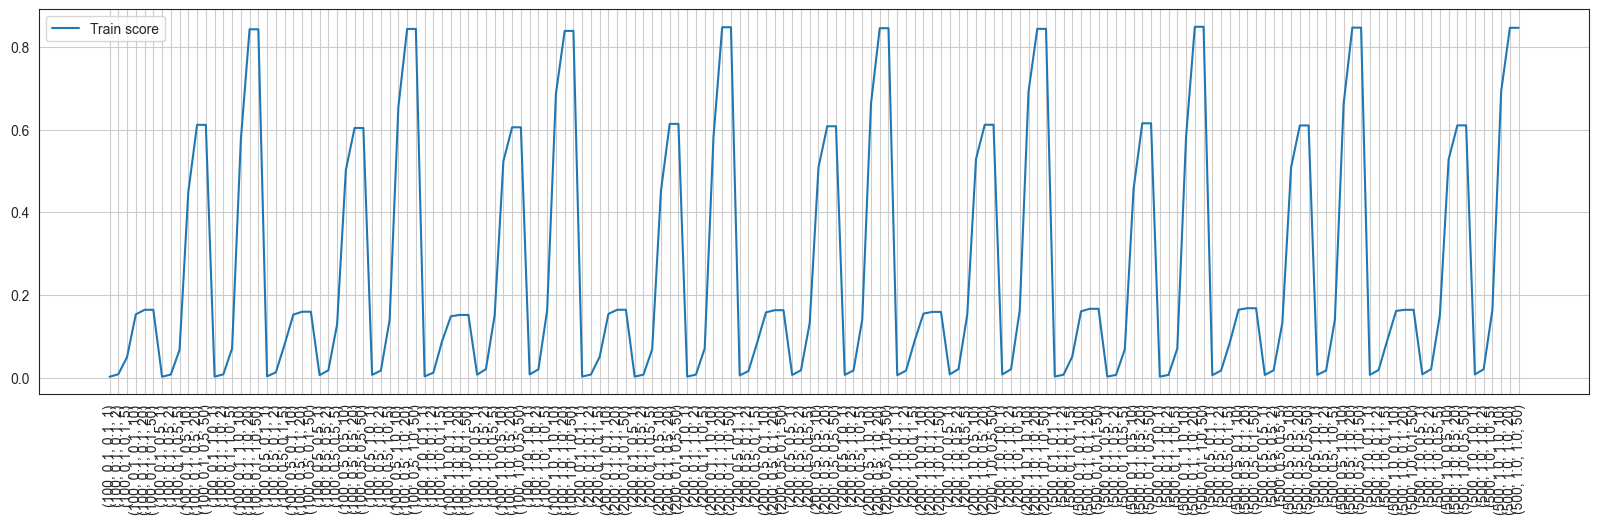

In [746]:
train_rf_reg = []

index_rf_reg = []

# Tuning the params for our model for get better accuracy
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5,10,20,50]:
                rfr = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                rfr.fit(X_train_scaled, Y_train)
                train_rf_reg.append(rfr.score(X_train_scaled, Y_train))
                index_rf_reg.append((n_estimators, max_features, 
                              max_samples, max_depth))
                
%matplotlib inline

# plotting the train scores for various tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index_rf_reg)), train_rf_reg, label = 'Train score')
plt.xticks(range(len(index_rf_reg)), index_rf_reg, rotation = 90)
plt.legend()
plt.grid()

In [747]:
scores_reg_rf = pd.DataFrame({'trainscore_rf':train_rf_reg},index=index_rf_reg)
scores_reg_rf.sort_values(by='trainscore_rf',ascending=False)

,trainscore_rf
"(500, 0.1, 1.0, 50)",0.848911
"(500, 0.1, 1.0, 20)",0.848911
"(200, 0.1, 1.0, 20)",0.847791
"(200, 0.1, 1.0, 50)",0.847791
"(500, 0.5, 1.0, 20)",0.846839
"(500, 0.5, 1.0, 50)",0.846790
"(500, 1.0, 1.0, 20)",0.846406
"(500, 1.0, 1.0, 50)",0.846382
"(200, 0.5, 1.0, 20)",0.845481
"(200, 0.5, 1.0, 50)",0.845481


In [759]:
bestrf_reg_hyp = RandomForestRegressor(random_state= 0, 
                                             n_estimators = 500,
                                             max_samples= 1.0, 
                                             max_features= 0.1, 
                                             max_depth= 50)
bestrf_reg_hyp.fit(X_train_scaled,Y_train)
reg_score['RandomForestRegression with Hyperparameter'] = bestrf_reg_hyp.score(X_train_scaled,Y_train)
print(bestrf_reg_hyp.score(X_train_scaled,Y_train))

0.8489111930407331


In [760]:
reg_score

{'Simple Linear Regression': 0.01193391821341816,
 'OLS': 0.004057244511522451,
 'DecisionTree Regressor': 0.0043963302392893144,
 'DecisionTree Regressor with Hyperparameter ': 0.9166829559822453,
 'Bagging with Decision Tree': 0.6103208876580113,
 'Simple RandomForest Regressor': 0.1627663649606118,
 'RandomForestRegression with Hyperparameter': 0.8489111930407331}

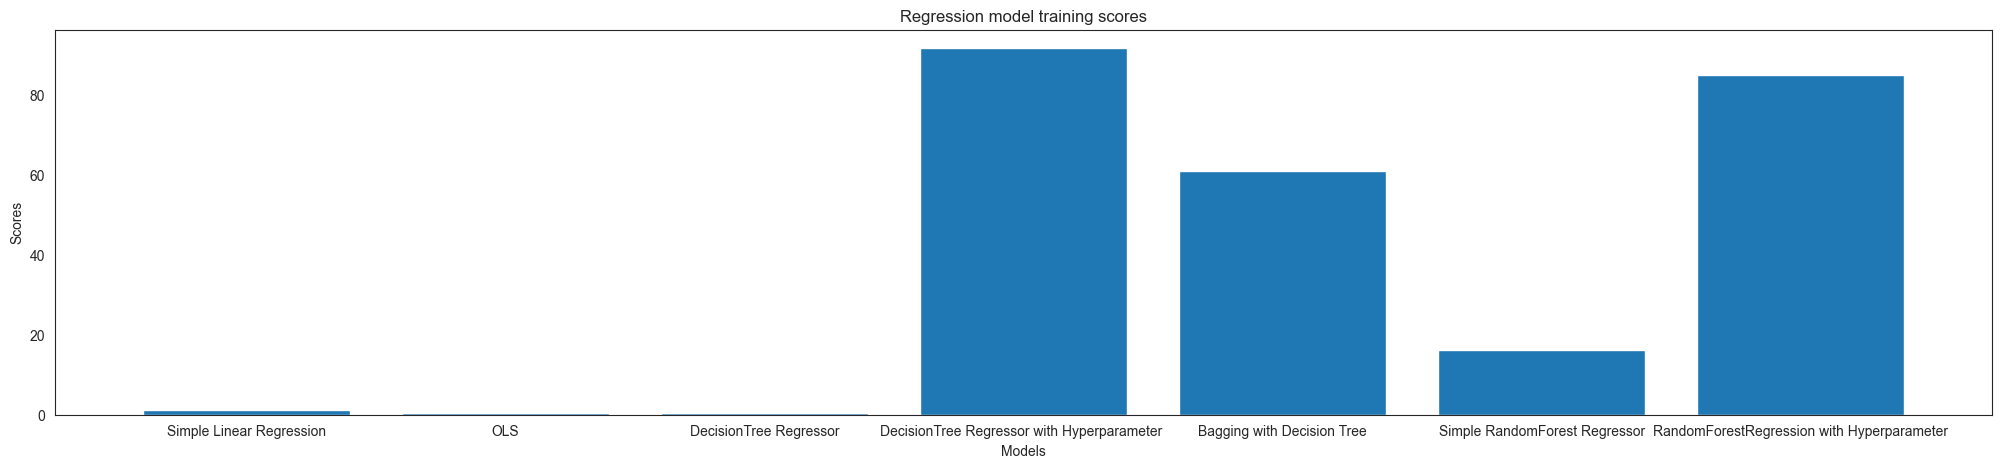

In [763]:
model_scores_reg =[val*100 for val in reg_score.values()]
model_names = [name for name in reg_score.keys()]

fig = plt.figure(figsize = (25, 5))
plt.bar(model_names, model_scores_reg)
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Regression model training scores")
plt.show()



#### from the above model the best model for the regression dataset is Decision Tree Regressor with random_state=0,max_depth=14,max_features= 0.5, min_samples_split= 2,min_samples_leaf=1

### Regression prediction

In [769]:
test_df_reg = pd.read_csv('regression_test.csv')
test_df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hospital Type        177 non-null    object 
 1   Num of Doctors       177 non-null    float64
 2   Num of Staff         182 non-null    float64
 3   Num of Departments   178 non-null    float64
 4   Surgical Facilities  175 non-null    object 
 5   Working Hours        187 non-null    object 
 6   Inpatient Facility   181 non-null    object 
 7   Outpatient Facility  178 non-null    object 
 8   Serving Population   180 non-null    object 
 9   Serving area         189 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.8+ KB


In [770]:
test_df_reg['Num of Doctors'].fillna(test_df_reg['Num of Doctors'].describe().to_dict()['25%'],inplace=True)

test_df_reg['Num of Departments'].fillna(test_df_reg['Num of Departments'].mode(),inplace=True)



In [771]:
median_staff = test_df_reg['Num of Staff'].median()
test_df_reg['Num of Staff'].fillna(median_staff,inplace=True)
median_Dept = test_df_reg['Num of Departments'].median()
test_df_reg['Num of Departments'].fillna(median_Dept,inplace=True)

In [772]:
test_df_reg['Hospital Type'].fillna('Missing',inplace=True)
cat_features=[]
for col, val in test_df_reg.select_dtypes(include="object").isnull().sum().to_dict().items() :
    if val > 0  and col != 'Hospital Type':
        cat_features.append(col)
for Hos_Type in test_df_reg['Hospital Type'].unique().tolist():
    print(Hos_Type)
    sliced_df=test_df_reg[test_df_reg['Hospital Type']==Hos_Type]
    for col in cat_features:
        df= sliced_df[sliced_df[col].isnull()]
        index=df.index.tolist()
        test_df_reg.loc[index,col]=sliced_df[col].value_counts().index.to_list()[0]

test_df_reg_copy = test_df_reg
test_df_reg['Serving area'].replace({'Rural':1,'Urban':0},inplace=True)
test_df_reg['Inpatient Facility'].replace({'No':0,'Yes':1},inplace=True)
test_df_reg['Outpatient Facility'].replace({'No':0,'Yes':1},inplace=True)
test_df_reg['Surgical Facilities'].replace({'No':1,'Yes':0},inplace=True)

test_df_reg['Serving Population'].replace({'200,000+':3,'150,000-200,000':2,'50,000 - 100,000':0,'100,000 - 150,000':1},inplace=True)
test_df_hospitalType = pd.get_dummies(test_df_reg['Hospital Type'],prefix='Hospital_Type')
test_df_reg[test_df_hospitalType.columns]=test_df_hospitalType
test_df_Work = pd.get_dummies(test_df_reg['Working Hours'],prefix='Working_Hours')
test_df_reg[reg_df_Work.columns]=test_df_Work
test_df_reg.drop(['Hospital Type','Working Hours'],axis=1,inplace=True)

Community hospital
Children's hospital
Teaching hospital
Missing
Research hospital
General hospital


In [773]:
test_df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Num of Doctors                     200 non-null    float64
 1   Num of Staff                       200 non-null    float64
 2   Num of Departments                 200 non-null    float64
 3   Surgical Facilities                200 non-null    int64  
 4   Inpatient Facility                 200 non-null    int64  
 5   Outpatient Facility                200 non-null    int64  
 6   Serving Population                 200 non-null    int64  
 7   Serving area                       200 non-null    int64  
 8   Hospital_Type_Children's hospital  200 non-null    uint8  
 9   Hospital_Type_Community hospital   200 non-null    uint8  
 10  Hospital_Type_General hospital     200 non-null    uint8  
 11  Hospital_Type_Missing              200 non-null    uint8  

In [774]:
test_scaled_reg = scaler_reg.transform(test_df_reg)

In [775]:
test_scaled_reg

array([[0.86666667, 0.57142857, 0.18181818, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.04081633, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.13333333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.57142857, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15      , 0.57142857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.57142857, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [777]:
predict_revenue = best_dt_reg.predict(test_scaled_reg)
test_df_reg1 = pd.read_csv('regression_test.csv')
test_df_reg1['Predict Hospital Revenue'] = predict_revenue
test_df_reg1.head()

,Hospital Type,Num of Doctors,Num of Staff,Num of Departments,Surgical Facilities,Working Hours,Inpatient Facility,Outpatient Facility,Serving Population,Serving area,Predict Hospital Revenue
0,Community hospital,133.0,290.0,12.0,No,NaN,No,Yes,"150,000-200,000",Urban,1356885.0
1,Community hospital,141.0,212.0,10.0,NaN,9-6,No,Yes,"150,000-200,000",Urban,1781324.0
2,Children's hospital,NaN,353.0,10.0,Yes,NaN,Yes,Yes,"150,000-200,000",Urban,1356885.0
3,Teaching hospital,90.0,249.0,15.0,Yes,10-7,No,Yes,"100,000 - 150,000",Rural,1781324.0
4,NaN,89.0,290.0,NaN,Yes,8-5,No,Yes,"100,000 - 150,000",Rural,3598448.0


In [778]:
# Predictive Hosiptal revenue for the test dataset
best_dt_reg.predict(test_scaled_reg)

array([1356885.        , 1781324.        , 1356885.        ,
       1781324.        , 3598448.        , 1781324.        ,
       2584425.        , 2826342.28571429, 2584425.        ,
       1356885.        , 3598448.        , 4069519.        ,
       2584425.        , 1781324.        , 3598448.        ,
       3598448.        , 4069519.        , 1356885.        ,
       1781324.        , 1781324.        , 4069519.        ,
       4069519.        , 4069519.        , 2811756.        ,
       1781324.        , 1356885.        , 4069519.        ,
       2182874.5       , 3598448.        , 1356885.        ,
       1781324.        , 1781324.        , 3598448.        ,
       4069519.        , 2584425.        , 1356885.        ,
       4069519.        , 4069519.        , 4069519.        ,
       1781324.        , 4069519.        , 4069519.        ,
       1356885.        , 1356885.        , 3598448.        ,
       3598448.        , 2584425.        , 1356885.        ,
       1356885.        ,

In [897]:
test_df_reg1['Predict Hospital Revenue'].mean()

2573165.8808333334

# Classification

### Data preparation

In [787]:
class_df = pd.read_csv('classification_train.csv')
class_df.head()

,Age,Gender,Income,Education level,Marital status,Past purchase history,Num past purchases,Buy a product
0,37.0,NaN,83000.0,high school,divorced,no,0.0,0
1,56.0,male,75000.0,graduate,single,no,0.0,0
2,58.0,NaN,41000.0,graduate,divorced,yes,0.0,0
3,27.0,male,41000.0,NaN,married,no,0.0,1
4,72.0,female,26000.0,high school,divorced,no,0.0,1


In [788]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    908 non-null    float64
 1   Gender                 888 non-null    object 
 2   Income                 905 non-null    float64
 3   Education level        900 non-null    object 
 4   Marital status         892 non-null    object 
 5   Past purchase history  903 non-null    object 
 6   Num past purchases     896 non-null    float64
 7   Buy a product          1000 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [789]:
class_df.describe()

,Age,Income,Num past purchases,Buy a product
count,908.000000,905.000000,896.000000,1000.000000
mean,98.185022,61163.535912,1.208705,0.504000
std,211.333074,22940.616796,1.709641,0.500234
min,18.000000,20000.000000,0.000000,0.000000
25%,34.000000,41000.000000,0.000000,0.000000
50%,51.000000,61000.000000,0.000000,1.000000
75%,68.000000,80000.000000,2.000000,1.000000
max,999.000000,100000.000000,5.000000,1.000000


#### Data Exploration for Numerical feature

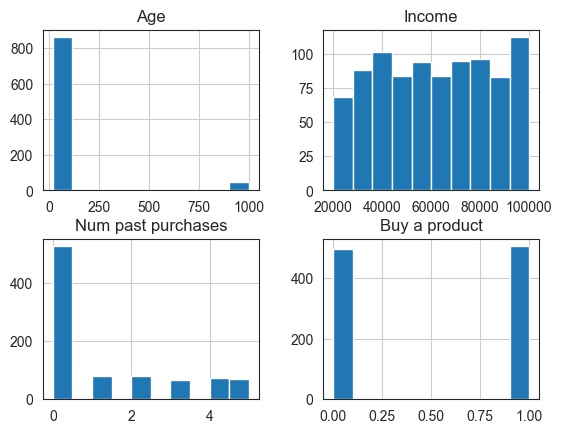

In [790]:
class_df.hist()
plt.show()

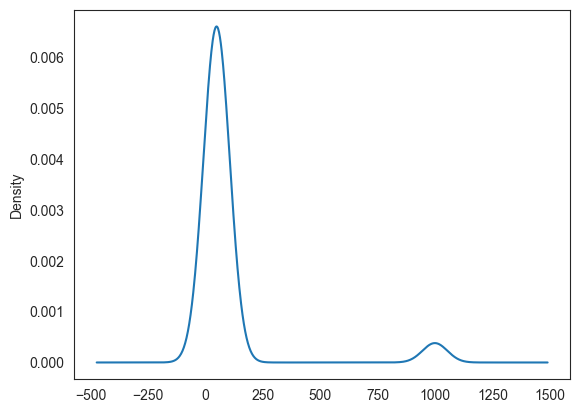

In [791]:
class_df['Age'].plot(kind ='kde')
plt.show()

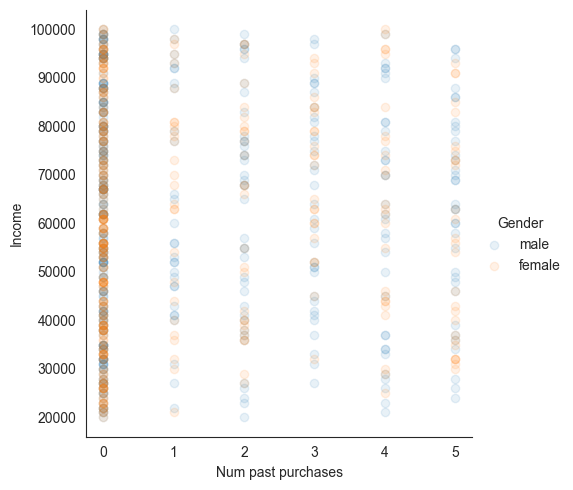

In [792]:
sb.lmplot(x='Num past purchases',
          y='Income',
          hue='Gender',
          data = class_df,
          fit_reg=False,
          scatter_kws=({'alpha':0.1})
         )

plt.show()

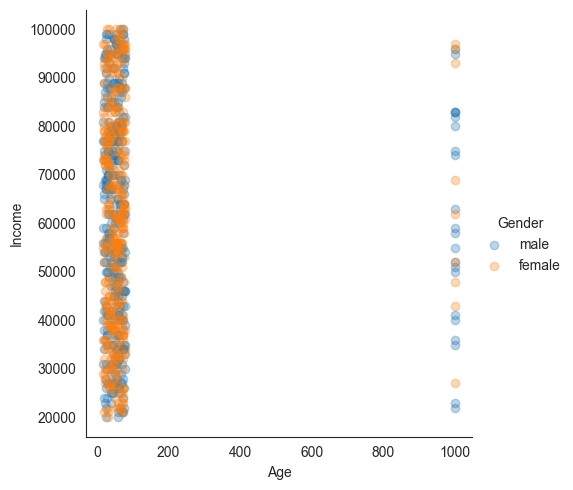

In [793]:
sb.lmplot(x='Age',
          y='Income',
          hue='Gender',
          data = class_df,
          fit_reg=False,
          scatter_kws=({'alpha':0.3})
         )
plt.show()

In [794]:
for i in range(len(class_df)):
    if 0 >= class_df.loc[i,'Age'] or class_df.loc[i,'Age'] >=100:
        class_df.loc[i,'Age']=np.nan
        


In [795]:
class_df.isnull().sum()

Age                      139
Gender                   112
Income                    95
Education level          100
Marital status           108
Past purchase history     97
Num past purchases       104
Buy a product              0
dtype: int64

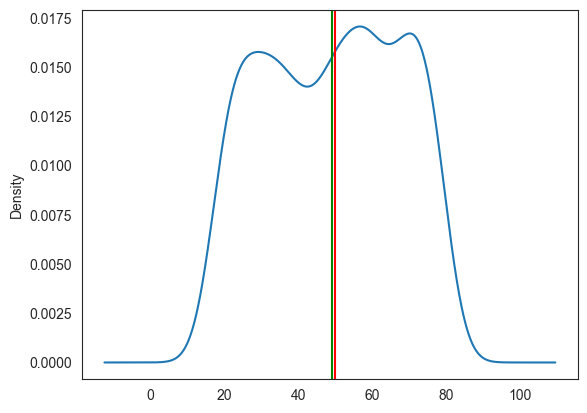

In [796]:
class_df['Age'].plot(kind='kde')
plt.axvline(x=class_df['Age'].median(),color ='red')
plt.axvline(x=class_df['Age'].mean(),color ='green')
plt.show()

In [797]:
class_df['Age'].fillna(class_df['Age'].median(),inplace=True)

In [798]:
class_df.describe()

,Age,Income,Num past purchases,Buy a product
count,1000.000000,905.000000,896.000000,1000.000000
mean,49.149000,61163.535912,1.208705,0.504000
std,16.959966,22940.616796,1.709641,0.500234
min,18.000000,20000.000000,0.000000,0.000000
25%,35.000000,41000.000000,0.000000,0.000000
50%,50.000000,61000.000000,0.000000,1.000000
75%,62.000000,80000.000000,2.000000,1.000000
max,79.000000,100000.000000,5.000000,1.000000


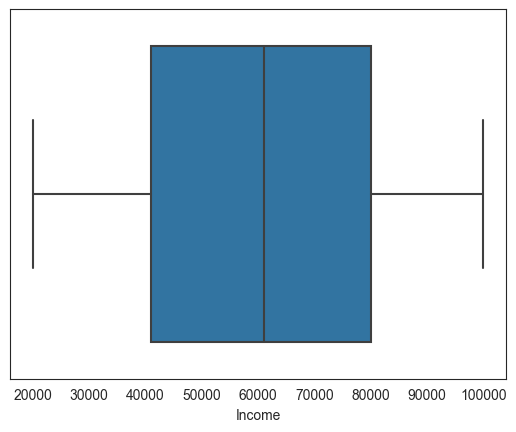

In [799]:
sb.boxplot(x='Income',data=class_df)
plt.show()

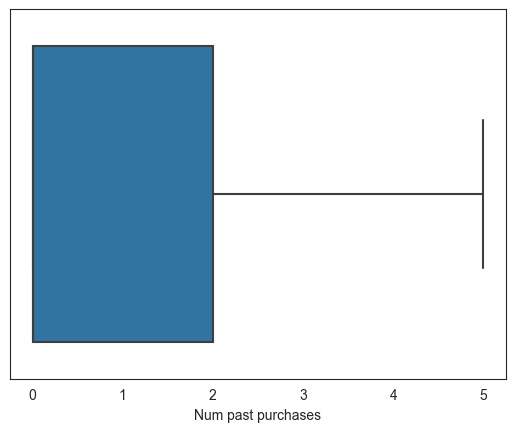

In [800]:
sb.boxplot(x='Num past purchases',data=class_df)
plt.show()


In [801]:
class_df['Num past purchases'].fillna(class_df['Num past purchases'].median(),inplace=True)
class_df['Income'].fillna(class_df['Income'].median(),inplace=True)

In [802]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   float64
 1   Gender                 888 non-null    object 
 2   Income                 1000 non-null   float64
 3   Education level        900 non-null    object 
 4   Marital status         892 non-null    object 
 5   Past purchase history  903 non-null    object 
 6   Num past purchases     1000 non-null   float64
 7   Buy a product          1000 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


#### Handling Categorial Features

<Axes: xlabel='count', ylabel='Gender'>

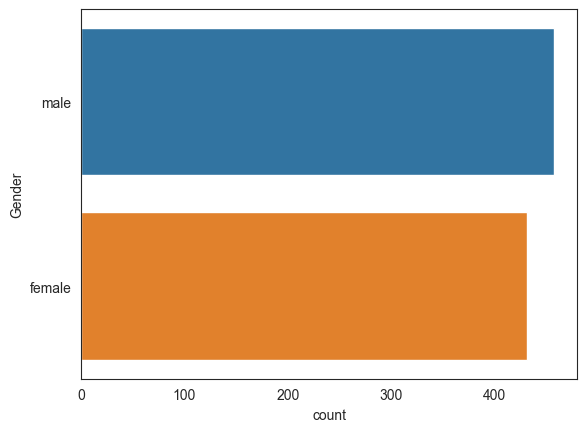

In [803]:
sb.countplot(y='Gender',data=class_df)

In [804]:
class_df['Gender'].fillna('male',inplace=True)


Education level  college  graduate  high school
Gender                                         
female               135       133          126
male                 164       169          173


<Axes: xlabel='Gender'>

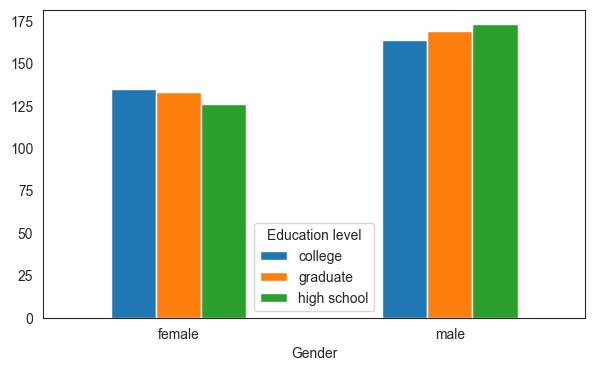

In [805]:
CrosstabResult=pd.crosstab(index=class_df['Gender'],columns=class_df['Education level'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

Marital status  divorced  married  single
Gender                                   
female               126      120     146
male                 173      168     159


<Axes: xlabel='Gender'>

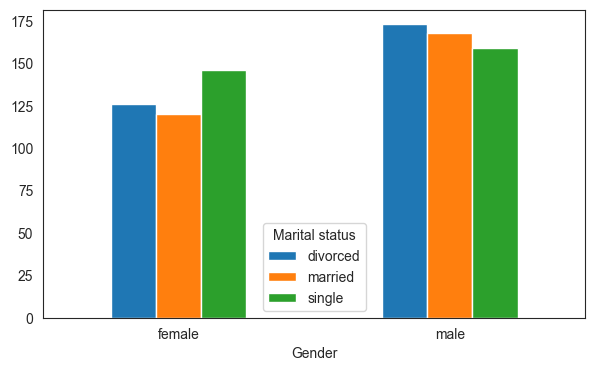

In [806]:
CrosstabResult=pd.crosstab(index=class_df['Gender'],columns=class_df['Marital status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

In [807]:
cat_features=[]
for col, val in class_df.select_dtypes(include="object").isnull().sum().to_dict().items() :
    if val > 0:
        cat_features.append(col)
for gender in class_df['Gender'].unique().tolist():
    sliced_df=class_df[class_df['Gender']==gender]
    for col in cat_features:
        df= sliced_df[sliced_df[col].isnull()]
        index=df.index.tolist()
        class_df.loc[index,col]=sliced_df[col].value_counts().index.to_list()[0]



In [808]:
class_df.select_dtypes(include="object").isnull().sum().to_dict().items()

dict_items([('Gender', 0), ('Education level', 0), ('Marital status', 0), ('Past purchase history', 0)])

In [809]:
class_df['Gender'].replace({'male':1,'female':0},inplace=True)

In [810]:
class_df['Education level'].value_counts()

high school    362
college        336
graduate       302
Name: Education level, dtype: int64

In [811]:
class_df['Education level'].replace({'graduate':2,'college':1,'high school':0},inplace=True)

In [812]:
class_df['Marital status'].value_counts()

divorced    368
single      344
married     288
Name: Marital status, dtype: int64

In [813]:
data_df_maritalstatus = pd.get_dummies(class_df['Marital status'], prefix = 'Martial_status')
class_df[data_df_maritalstatus.columns] = data_df_maritalstatus

In [814]:
class_df['Past purchase history'].value_counts()

yes    505
no     495
Name: Past purchase history, dtype: int64

In [815]:
class_df['Past purchase history'].replace({'yes':1,'no':0},inplace=True)

In [816]:
class_df = class_df.drop('Marital status',axis=1)
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   float64
 1   Gender                   1000 non-null   int64  
 2   Income                   1000 non-null   float64
 3   Education level          1000 non-null   int64  
 4   Past purchase history    1000 non-null   int64  
 5   Num past purchases       1000 non-null   float64
 6   Buy a product            1000 non-null   int64  
 7   Martial_status_divorced  1000 non-null   uint8  
 8   Martial_status_married   1000 non-null   uint8  
 9   Martial_status_single    1000 non-null   uint8  
dtypes: float64(3), int64(4), uint8(3)
memory usage: 57.7 KB


### Classification model training

In [817]:
from sklearn.preprocessing import MinMaxScaler
Y_class = class_df['Buy a product']
X_class = class_df.drop('Buy a product',axis = 1)
scaler_class = MinMaxScaler()
scaler_class.fit(X_class)
X_class_scaled = scaler_class.transform(X_class)


In [818]:
X_scaled_df = pd.DataFrame(X_class_scaled,columns=X_class.columns)

In [819]:
X_scaled_df.head()

,Age,Gender,Income,Education level,Past purchase history,Num past purchases,Martial_status_divorced,Martial_status_married,Martial_status_single
0,0.311475,1.0,0.7875,0.0,0.0,0.0,1.0,0.0,0.0
1,0.622951,1.0,0.6875,1.0,0.0,0.0,0.0,0.0,1.0
2,0.655738,1.0,0.2625,1.0,1.0,0.0,1.0,0.0,0.0
3,0.147541,1.0,0.2625,0.0,0.0,0.0,0.0,1.0,0.0
4,0.885246,0.0,0.0750,0.0,0.0,0.0,1.0,0.0,0.0


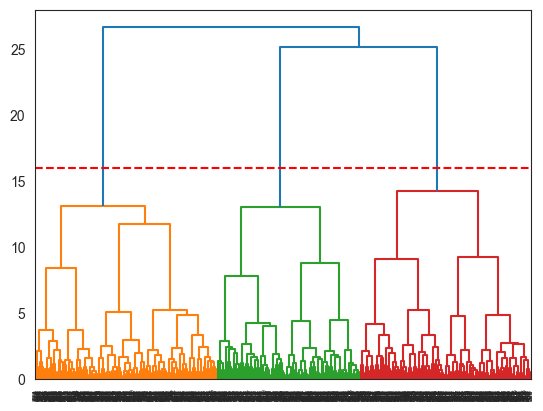

In [820]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X_scaled_df, method = 'ward'))
plt.axhline(y=16, color='r', linestyle='--')
plt.show()

### Based on the above dendogram we can split the above train dataset into 4 cluster

In [821]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster= AgglomerativeClustering(distance_threshold=16,n_clusters=None)
agg_cluster.fit(X_scaled_df)

AgglomerativeClustering(distance_threshold=16, n_clusters=None)

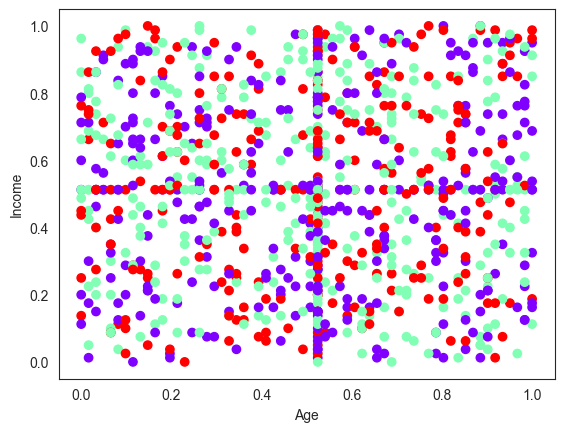

In [822]:
# plotting the clusters with their centroids for agglomerative clustering
plt.scatter(x='Age',y='Income',data=X_scaled_df,c=agg_cluster.labels_,cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [823]:
agg_df = X_class
agg_df['Label']= agg_cluster.labels_

In [824]:
agg_df['Label'].value_counts()

1    368
0    344
2    288
Name: Label, dtype: int64

In [825]:
# Pattern in each based on the education level 
agg_df[agg_df.Label == 1 ]['Education level'].value_counts()

0    139
1    125
2    104
Name: Education level, dtype: int64

In [826]:
# Pattern in each based on the education level 
agg_df[agg_df.Label == 0 ]['Education level'].value_counts()

2    120
0    118
1    106
Name: Education level, dtype: int64

In [827]:
# Pattern in each based on the education level 
agg_df[agg_df.Label == 2 ]['Education level'].value_counts()

0    105
1    105
2     78
Name: Education level, dtype: int64

### K means Clustering

In [828]:
# since this data set is not perfect for clustering we are using K = 3 as value for clustering the dataset
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=0)
km.fit(X_scaled_df)

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

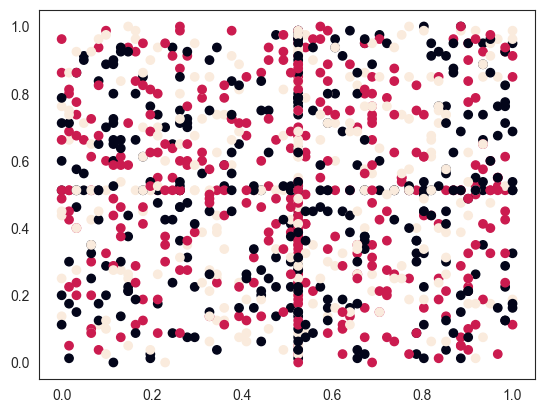

In [829]:
plt.scatter(x='Age',y='Income',data=X_scaled_df,c=km.labels_)
plt.show()

In [830]:
Kmeans_df= X_class
Kmeans_df['Label'] = km.labels_

In [831]:
Kmeans_df.head()

,Age,Gender,Income,Education level,Past purchase history,Num past purchases,Martial_status_divorced,Martial_status_married,Martial_status_single,Label
0,37.0,1,83000.0,0,0,0.0,1,0,0,1
1,56.0,1,75000.0,2,0,0.0,0,0,1,0
2,58.0,1,41000.0,2,1,0.0,1,0,0,1
3,27.0,1,41000.0,0,0,0.0,0,1,0,2
4,72.0,0,26000.0,0,0,0.0,1,0,0,1


In [832]:
Kmeans_df['Label'].value_counts()

1    368
0    344
2    288
Name: Label, dtype: int64

In [833]:
# Pattern in each based on the education level 
Kmeans_df[Kmeans_df.Label == 1 ]['Education level'].value_counts()

0    139
1    125
2    104
Name: Education level, dtype: int64

In [834]:
Kmeans_df[Kmeans_df.Label == 0]['Education level'].value_counts()

2    120
0    118
1    106
Name: Education level, dtype: int64

In [835]:
Kmeans_df[Kmeans_df.Label == 2 ]['Education level'].value_counts()

0    105
1    105
2     78
Name: Education level, dtype: int64

From the above counts of value based on the model generated from the Kmeans Clustering with K = 3 tell us that the most of customer has High School as the highest education level

In [867]:
X_train_class= X_class
Y_train_class = Y_class

X_train_class.drop("Label",axis=1,inplace=True)


In [868]:
classScaled = MinMaxScaler()
X_train_class_scaled = classScaled.fit_transform(X_train_class)

In [869]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(random_state =1234)
logModel.fit(X_train_class_scaled,Y_train_class)
logscore = logModel.score(X_train_class_scaled,Y_train_class)

In [870]:
print("Train score accuracy:",logscore)

Train score accuracy: 0.556


In [871]:
logModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [872]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier(random_state=1234, criterion='entropy',max_depth = 2)
dt_class.fit(X_train_class_scaled,Y_train_class)
score_dt_class = dt_class.score(X_train_class_scaled,Y_train_class)
print("Train score decision tree:",score_dt_class)

Train score decision tree: 0.537


In [873]:
train_score_dt = []

index_dt = []
for max_depth in [1, 2, 3,5,8,10,12]:
    for max_features in [0.1, 0.5, 1.0]:
        for min_sample_split in [2,5,10]:
            for min_sample_leaf in [1,2,4]:
                dt_class = DecisionTreeClassifier(
                    max_depth= max_depth,
                                max_features= max_features,min_samples_split=min_sample_split,
                    min_samples_leaf=min_sample_leaf,
                                random_state= 0)

                dt_class.fit(X_train_class_scaled, Y_train_class)
                train_score_dt.append(dt_class.score(X_train_class_scaled, Y_train_class))
                index_dt.append((max_depth,
                              min_sample_split,min_sample_leaf, max_features))

In [874]:
scores_dt = pd.DataFrame({'trainscore':train_score_dt},index = index_dt)
scores_dt.sort_values(by='trainscore',ascending =False)

,trainscore
"(12, 2, 1, 0.1)",0.935
"(12, 2, 1, 1.0)",0.889
"(12, 2, 1, 0.5)",0.850
"(12, 5, 1, 1.0)",0.834
"(12, 2, 2, 1.0)",0.832
"(12, 2, 2, 0.5)",0.832
"(10, 2, 1, 1.0)",0.823
"(12, 5, 1, 0.1)",0.821
"(12, 5, 2, 1.0)",0.819
"(12, 5, 1, 0.5)",0.816


In [876]:
bestclass_dt = DecisionTreeClassifier(max_depth=12,min_samples_leaf=1,min_samples_split=2,max_features=0.1,random_state=0)
bestclass_dt.fit(X_train_class_scaled,Y_train_class)

bestclass_dt_score = bestclass_dt.score(X_train_class_scaled,Y_train_class)
print(bestclass_dt_score)

0.935


In [877]:
# Bagging Classifier with decision tree classifier using hyperparameter
train_score = []
valid_score = []
index_bg_class = []
for max_depth in [1, 2, 3,4,5,6,7,8,10,12]:
    for n_estimators in [50,100, 500]:
        for max_samples in [0.05, 0.1, 0.2]:
            for max_features in [0.05, 0.1, 0.15, 0.2]:
                base_estimator = DecisionTreeClassifier(max_depth= max_depth, 
                                                        random_state= 0)
                bagging_clf = BaggingClassifier(base_estimator= base_estimator,
                                n_estimators= n_estimators,
                                max_samples= max_samples,
                                max_features= max_features,
                                random_state= 0)

                bagging_clf.fit(X_train_class_scaled, Y_train_class)
                train_score.append(bagging_clf.score(X_train_class_scaled, Y_train_class))
                index_bg_class.append((max_depth, n_estimators,
                              max_samples, max_features))

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/utkarshsingh/PycharmProjects/PythonProject1/venv/lib/pyth

In [878]:
scores = pd.DataFrame({'trainscore':train_score},index=index_bg_class)
scores.head()

,trainscore
"(1, 50, 0.05, 0.05)",0.525
"(1, 50, 0.05, 0.1)",0.525
"(1, 50, 0.05, 0.15)",0.525
"(1, 50, 0.05, 0.2)",0.525
"(1, 50, 0.1, 0.05)",0.543


In [880]:

scores.sort_values(by='trainscore',ascending=False)



,trainscore
"(12, 500, 0.2, 0.2)",0.609
"(12, 500, 0.2, 0.15)",0.609
"(12, 500, 0.2, 0.1)",0.609
"(12, 500, 0.2, 0.05)",0.609
"(10, 500, 0.2, 0.2)",0.606
"(10, 500, 0.2, 0.1)",0.606
"(10, 500, 0.2, 0.05)",0.606
"(10, 500, 0.2, 0.15)",0.606
"(6, 500, 0.2, 0.1)",0.591
"(8, 500, 0.2, 0.05)",0.591


In [881]:
bestdt_class = DecisionTreeClassifier(max_depth=12,random_state=0)
bestBg_class = BaggingClassifier(estimator=bestdt_class,
                                 random_state=0,n_estimators=500,max_features=0.2,max_samples=0.2)
bestBg_class.fit(X_train_class_scaled,Y_train_class)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=12,
                                                   random_state=0),
                  max_features=0.2, max_samples=0.2, n_estimators=500,
                  random_state=0)

In [882]:
bestBg = bestBg_class.score(X_train_class_scaled,Y_train_class)
print('Train score bagging classifier:',bestBg_class.score(X_train_class_scaled,Y_train_class))


Train score bagging classifier: 0.609


In [883]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(random_state=0,max_depth=5)
rf_class.fit(X_train_class_scaled,Y_train_class)
rf_class_score = rf_class.score(X_train_class_scaled,Y_train_class)
print("Train Score: ",rf_class.score(X_train_class_scaled,Y_train_class))

Train Score:  0.725


In [884]:
train_class_rf = []
test_class_rf = []
index_rf_class = []
for n_estimators in [50, 100, 200, 500]:
    for max_features in [0.1, 0.5, 0.1]:
        for max_samples in [0.1, 0.5, 0.1]:
            for max_depth in [1, 2, 5,8]:
                rfc = RandomForestClassifier(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features,
                                             max_depth= max_depth)
                rfc.fit(X_train_class_scaled, Y_train_class)
                train_class_rf.append(rfc.score(X_train_class_scaled, Y_train_class))
                index_rf_class.append((n_estimators, max_features, 
                              max_samples, max_depth))

In [885]:
scores_rf_class = pd.DataFrame({'Trainscore':train_class_rf},index=index_rf_class)
scores_rf_class.sort_values(by='Trainscore',ascending=False)

,Trainscore
"(500, 0.5, 0.5, 8)",0.890
"(200, 0.5, 0.5, 8)",0.878
"(100, 0.5, 0.5, 8)",0.870
"(200, 0.1, 0.5, 8)",0.867
"(200, 0.1, 0.5, 8)",0.867
"(500, 0.1, 0.5, 8)",0.867
"(500, 0.1, 0.5, 8)",0.867
"(50, 0.5, 0.5, 8)",0.849
"(100, 0.1, 0.5, 8)",0.843
"(100, 0.1, 0.5, 8)",0.843


In [887]:
# best model based on the train and test score is at maxdepth = 2,n_estimator=100,max_samples =0.5,max_features=0.5

bestrf_class = RandomForestClassifier(random_state= 0, 
                                             n_estimators = 500,
                                             max_samples= 0.5, 
                                             max_features= 0.5,
                                             max_depth= 8)
bestrf_class.fit(X_train_class_scaled,Y_train_class)
bestrftrain = bestrf_class.score(X_train_class_scaled,Y_train_class)
print("Train score randomforest :",bestrf_class.score(X_train_class_scaled,Y_train_class))

Train score randomforest : 0.89


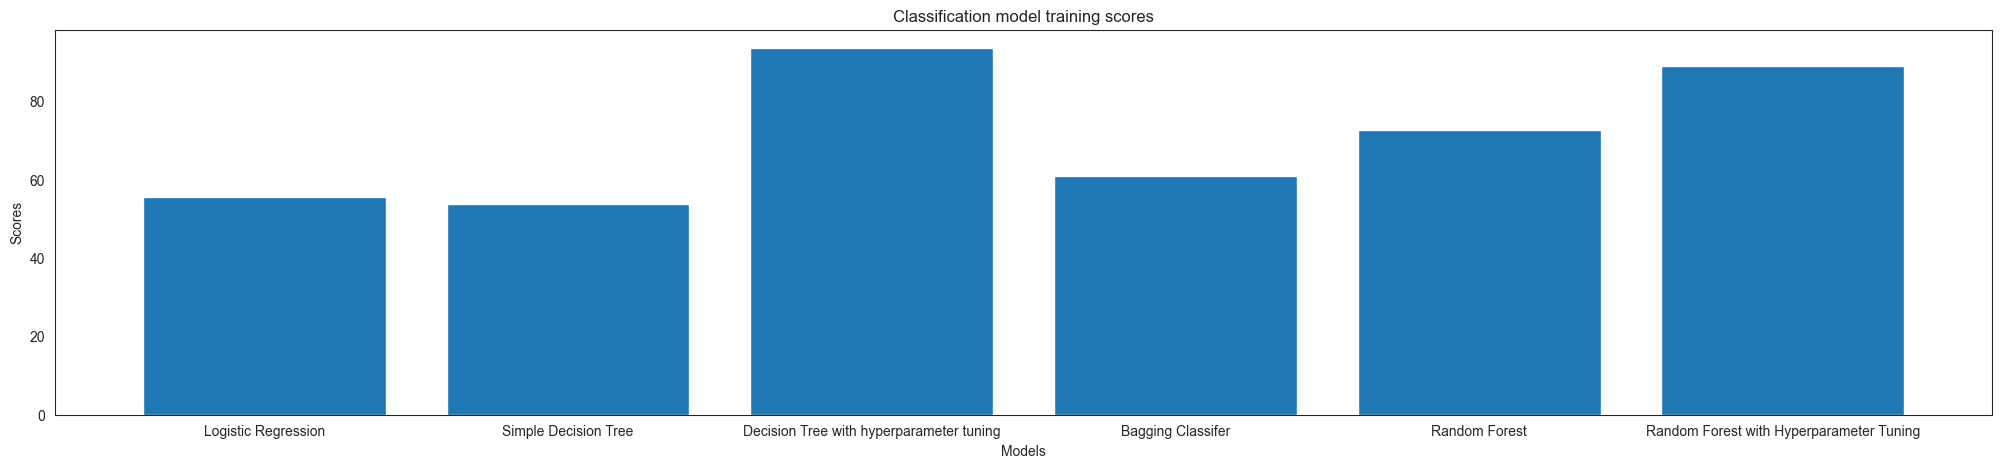

In [888]:
model_scores = [logscore*100, score_dt_class*100,bestclass_dt_score*100,bestBg*100,rf_class_score*100,bestrftrain*100]

model_names = ["Logistic Regression","Simple Decision Tree","Decision Tree with hyperparameter tuning","Bagging Classifer","Random Forest",
               "Random Forest with Hyperparameter Tuning"]
# plotting the train scores for all our above models, that we have trained.
fig = plt.figure(figsize = (25, 5))
plt.bar(model_names, model_scores)
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Classification model training scores")
plt.show()

### Classification prediction

In [889]:
class_test = pd.read_csv('classification_test.csv')

In [890]:
class_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    176 non-null    float64
 1   Gender                 177 non-null    object 
 2   Income                 173 non-null    float64
 3   Education level        178 non-null    object 
 4   Marital status         175 non-null    object 
 5   Past purchase history  183 non-null    object 
 6   Num past purchases     174 non-null    float64
dtypes: float64(3), object(4)
memory usage: 11.1+ KB


In [891]:

for i in range(len(class_test)):
    if 0 >= class_test.loc[i,'Age'] or class_test.loc[i,'Age'] >=100:
        class_test.loc[i,'Age']=np.nan
        
class_test['Age'].fillna(class_test['Age'].median(),inplace=True)
class_test['Num past purchases'].fillna(class_test['Num past purchases'].median(),inplace=True)
class_test['Income'].fillna(class_test['Income'].median(),inplace=True)

class_test['Gender'].fillna('male',inplace=True)
cat_features=[]
for col, val in class_test.select_dtypes(include="object").isnull().sum().to_dict().items() :
    if val > 0 and col !='Gender':
        cat_features.append(col)
for gender in class_test['Gender'].unique().tolist():
    sliced_df=class_test[class_test['Gender']==gender]
    for col in cat_features:
        df= sliced_df[sliced_df[col].isnull()]
        index=df.index.tolist()
        class_test.loc[index,col]=sliced_df[col].value_counts().index.to_list()[0]


class_test['Gender'].replace({'male':1,'female':0},inplace=True)
class_test['Education level'].replace({'graduate':2,'college':1,'high school':0},inplace=True)
data_test_df_maritalstatus = pd.get_dummies(class_test['Marital status'], prefix = 'Martial_status')
class_test[data_df_maritalstatus.columns] = data_test_df_maritalstatus
class_test['Past purchase history'].replace({'yes':1,'no':0},inplace=True)


In [892]:
class_test = class_test.drop('Marital status',axis=1)
class_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      200 non-null    float64
 1   Gender                   200 non-null    int64  
 2   Income                   200 non-null    float64
 3   Education level          200 non-null    int64  
 4   Past purchase history    200 non-null    int64  
 5   Num past purchases       200 non-null    float64
 6   Martial_status_divorced  200 non-null    uint8  
 7   Martial_status_married   200 non-null    uint8  
 8   Martial_status_single    200 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 10.1 KB


In [893]:
class_test_scaled = classScaled.transform(class_test)

In [894]:
class_test

,Age,Gender,Income,Education level,Past purchase history,Num past purchases,Martial_status_divorced,Martial_status_married,Martial_status_single
0,61.0,1,24000.0,2,1,0.0,1,0,0
1,44.0,1,62000.0,0,0,0.0,1,0,0
2,49.0,0,64000.0,1,1,0.0,0,0,1
3,49.0,1,92000.0,1,0,0.0,0,1,0
4,62.0,0,34000.0,0,0,0.0,0,1,0
5,61.0,1,58000.0,1,0,0.0,1,0,0
6,66.0,0,90000.0,1,0,0.0,1,0,0
7,50.0,1,56000.0,1,1,2.0,0,1,0
8,19.0,1,92000.0,1,0,0.0,0,0,1
9,43.0,0,60000.0,0,1,3.0,1,0,0


In [896]:
bestclass_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 0.1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [901]:
predictedvalue = bestclass_dt.predict(class_test_scaled)

In [902]:
test_data = pd.read_csv('classification_test.csv')
test_data['Predicted Buy a Product'] = predictedvalue

In [903]:
test_data.head()

,Age,Gender,Income,Education level,Marital status,Past purchase history,Num past purchases,Predicted Buy a Product
0,61.0,male,24000.0,graduate,divorced,yes,0.0,0
1,44.0,male,62000.0,high school,divorced,no,NaN,0
2,49.0,female,NaN,college,single,yes,NaN,0
3,NaN,male,92000.0,college,married,no,0.0,1
4,62.0,female,34000.0,high school,married,no,0.0,1
